
# In this investigation, we aim to find out:

## (a) whether we can predict if a patient is in early or late stage of liver cirrhosis based on his/her medical information collected and
## (b) factors that are most useful in assisting our prediction

# Importing libraries 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly
import plotly.express as px
import plotly.io as pio

sns.set()

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [2]:
liverData = pd.read_csv("C:/Users/qiao shi/Downloads/archive/cirrhosis.csv")
liverData.info()
liverData.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

From the information we obtained from the data set, we observed that some data contain numerous NULL values. As such, we will be replacing these NULL values during data cleaning. 

# Step 1: Data Cleaning 

### Removing the column titled "Stage". 

In [3]:
liverData.dropna(subset= ['Stage'], inplace=True)

In [4]:
arr = liverData.select_dtypes(include = (['int64', 'float64'])).columns
for c in arr:
    liverData[c].fillna(liverData[c].median(), inplace=True)
    
arr.isna()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

### Replacing NULL values with the mode of each column.  

In [5]:
df_cat_col = liverData.select_dtypes(include=('object')).columns
for c in df_cat_col:
    liverData[c].fillna(liverData[c].mode().values[0], inplace=True)
    
liverData.select_dtypes(include=('object')).isna().sum()

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

In [6]:
z = (liverData - liverData.mean())/liverData.std()
z2 = z[(z>5)|(z<-5)]
k = z[["Albumin",'Albumin',"Bilirubin","Cholesterol","Copper","Platelets",'Prothrombin',"Tryglicerides","SGOT"]]


for p in k:
    z3 = np.where((z[p]>6.5) | (z[p]<-6.5))
    print(z3)

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([129, 246], dtype=int64),)
(array([17], dtype=int64),)
(array([], dtype=int64),)
(array([320], dtype=int64),)
(array([74], dtype=int64),)
(array([165], dtype=int64),)


C:\Users\qiao shi\AppData\Local\Temp\ipykernel_14168\3224818824.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z = (liverData - liverData.mean())/liverData.std()


In [7]:
#Checking that we have replaced all missing values

liverData.isnull().sum()
liverData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             412 non-null    int64  
 1   N_Days         412 non-null    int64  
 2   Status         412 non-null    object 
 3   Drug           412 non-null    object 
 4   Age            412 non-null    int64  
 5   Sex            412 non-null    object 
 6   Ascites        412 non-null    object 
 7   Hepatomegaly   412 non-null    object 
 8   Spiders        412 non-null    object 
 9   Edema          412 non-null    object 
 10  Bilirubin      412 non-null    float64
 11  Cholesterol    412 non-null    float64
 12  Albumin        412 non-null    float64
 13  Copper         412 non-null    float64
 14  Alk_Phos       412 non-null    float64
 15  SGOT           412 non-null    float64
 16  Tryglicerides  412 non-null    float64
 17  Platelets      412 non-null    float64
 18  Prothrombi

In [8]:
print(liverData)

      ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
0      1     400      D  D-penicillamine  21464   F       Y            Y   
1      2    4500      C  D-penicillamine  20617   F       N            Y   
2      3    1012      D  D-penicillamine  25594   M       N            N   
3      4    1925      D  D-penicillamine  19994   F       N            Y   
4      5    1504     CL          Placebo  13918   F       N            Y   
..   ...     ...    ...              ...    ...  ..     ...          ...   
413  414     681      D  D-penicillamine  24472   F       N            Y   
414  415    1103      C  D-penicillamine  14245   F       N            Y   
415  416    1055      C  D-penicillamine  20819   F       N            Y   
416  417     691      C  D-penicillamine  21185   F       N            Y   
417  418     976      C  D-penicillamine  19358   F       N            Y   

    Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0      

### Create a new column on dataset to see whether the patient is in early or late stage of disease. 

In [9]:
# If 0, patient is in early stage. 
# If 1, patient is in late stage. 
# We first expressed it in numeric form for comparison. 

def Early_Late_Stage(liverData): 
    if (liverData["Stage"] == 1.0) or (liverData["Stage"] == 2.0):
        return 0
    else: 
        return 1
    
liverData["Early/Late Stage"] = liverData.apply(lambda liverData: Early_Late_Stage(liverData), axis=1)

In [10]:
# Converting qualitative data into numeric form for comparison. 

liverData["Sex"].replace("M", 0, inplace=True)
liverData["Sex"].replace("F",1,inplace = True)
liverData["Hepatomegaly"].replace("Y", 1, inplace=True)
liverData["Hepatomegaly"].replace("N", 0, inplace=True)
liverData["Ascites"].replace("Y", 1, inplace=True)
liverData["Ascites"].replace("N", 0, inplace=True)
liverData["Edema"].replace("Y", 1, inplace=True)
liverData["Edema"].replace("N", 0, inplace=True)
liverData["Edema"].replace("S", 0, inplace=True)
liverData["Status"].replace("CL", 0, inplace=True)
liverData["Status"].replace("C", 1, inplace=True)
liverData["Status"].replace("D", 0, inplace=True)
liverData["Drug"].replace("D-penicillamine", 1, inplace=True)
liverData["Drug"].replace("Placebo", 0, inplace=True)
liverData["Spiders"].replace("Y", 1, inplace=True)
liverData["Spiders"].replace("N", 0, inplace=True)


<AxesSubplot:>

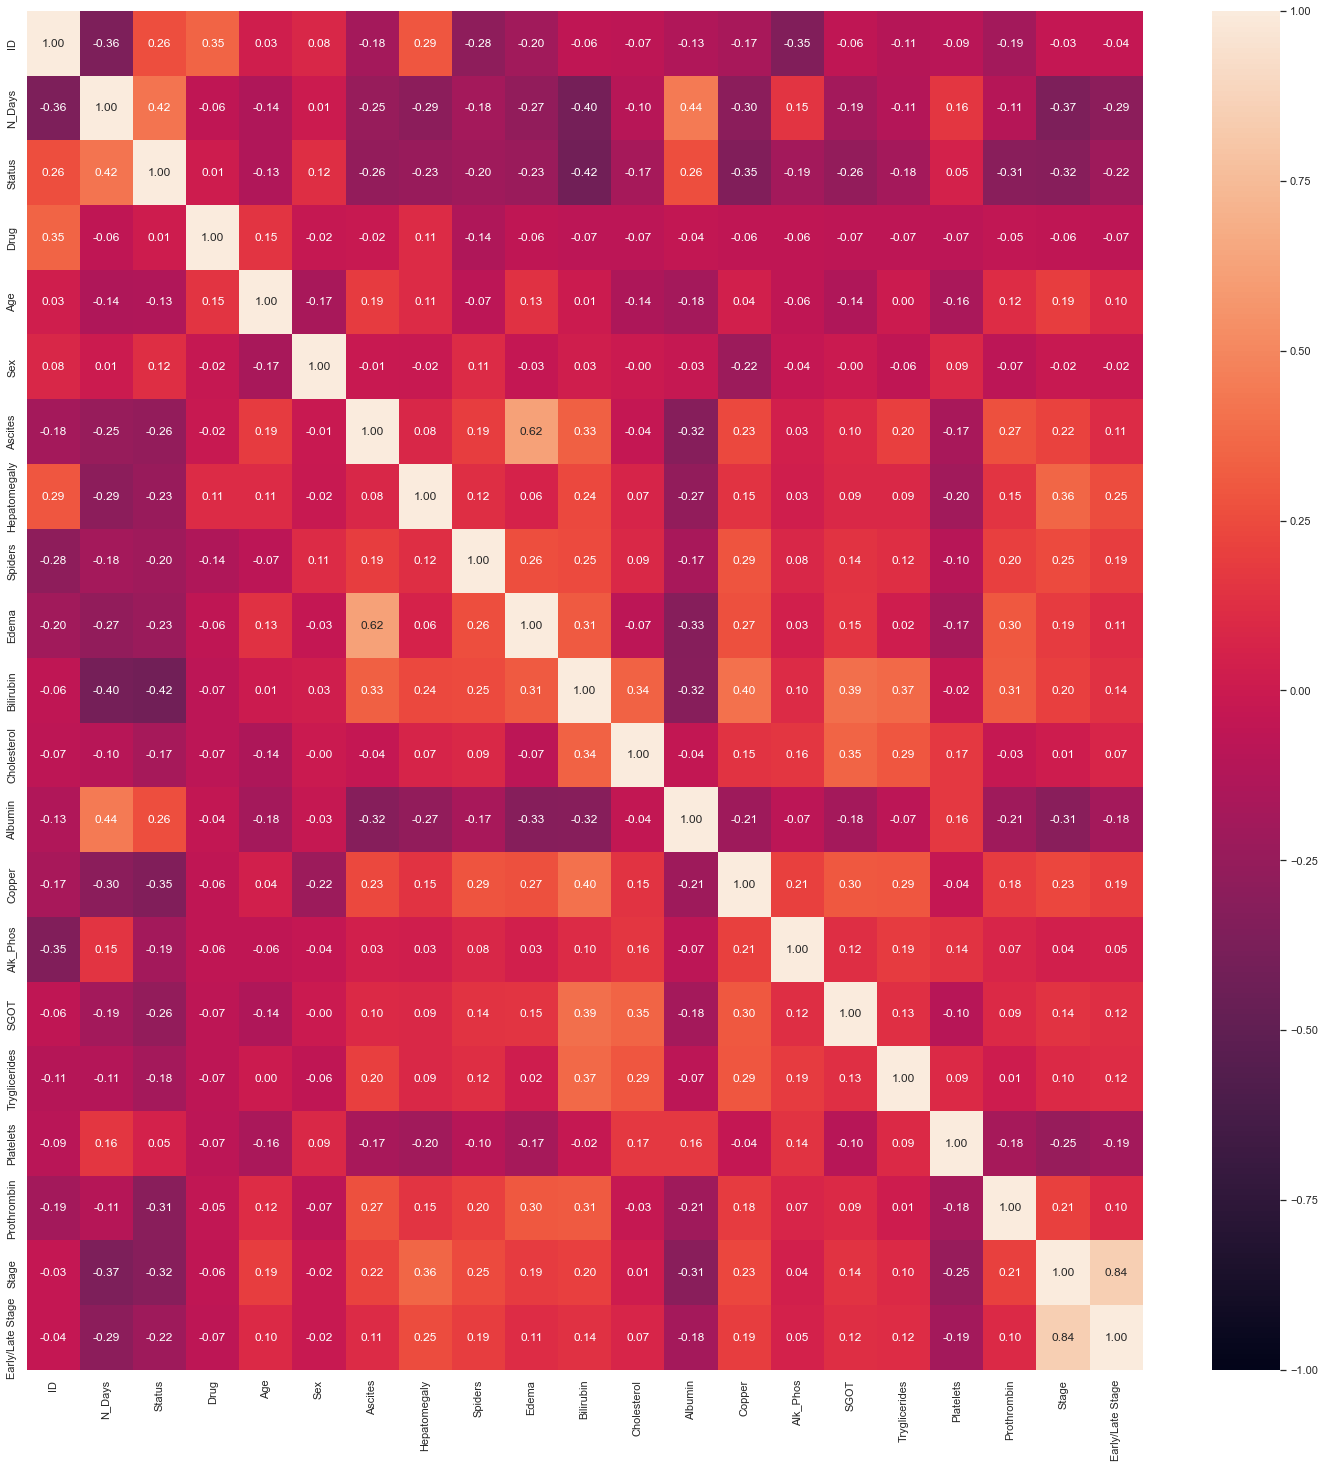

In [11]:
plt.figure(figsize = (25,25)) 
sns.heatmap(liverData.corr(), vmin =-1, vmax =1, annot = True, fmt = ".2f")

In [12]:
liverData["Sex"].replace(0, "M", inplace=True)
liverData["Sex"].replace(1, "F", inplace=True)
liverData["Hepatomegaly"].replace(1, "Y", inplace=True)
liverData["Hepatomegaly"].replace(0, "N", inplace=True)
liverData["Ascites"].replace(1, "Y", inplace=True)
liverData["Ascites"].replace(0, "N", inplace=True)
liverData["Edema"].replace(1, "Y", inplace=True)
liverData["Edema"].replace(0, "N", inplace=True)
liverData["Edema"].replace(0, "S", inplace=True)
liverData["Status"].replace(0, "CL", inplace=True)
liverData["Status"].replace(1, "C", inplace=True)
liverData["Status"].replace(0, "D", inplace=True)
liverData["Drug"].replace(1, "D-penicillamine", inplace=True)
liverData["Drug"].replace(0, "Placebo", inplace=True)
liverData["Spiders"].replace(1, "Y", inplace=True)
liverData["Spiders"].replace(0, "N", inplace=True)


In [13]:
# If 0, patient is in early stage. 
# If 1, patient is in late stage. 

def Early_Late_Stage(liverData): 
    if (liverData["Stage"] == 1.0) or (liverData["Stage"] == 2.0):
        return "Early"
    else: 
        return "Late"
    
liverData["Early/Late Stage"] = liverData.apply(lambda liverData: Early_Late_Stage(liverData), axis=1)

### Removing the column titled "ID".

In [14]:
liverData.drop('ID',inplace = True, axis=1)
print(liverData)

     N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0       400     CL  D-penicillamine  21464   F       Y            Y       Y   
1      4500      C  D-penicillamine  20617   F       N            Y       Y   
2      1012     CL  D-penicillamine  25594   M       N            N       N   
3      1925     CL  D-penicillamine  19994   F       N            Y       Y   
4      1504     CL          Placebo  13918   F       N            Y       Y   
..      ...    ...              ...    ...  ..     ...          ...     ...   
413     681     CL  D-penicillamine  24472   F       N            Y       N   
414    1103      C  D-penicillamine  14245   F       N            Y       N   
415    1055      C  D-penicillamine  20819   F       N            Y       N   
416     691      C  D-penicillamine  21185   F       N            Y       N   
417     976      C  D-penicillamine  19358   F       N            Y       N   

    Edema  Bilirubin  Cholesterol  Albumin  Copper 

### Coverting age from days to years.

In [15]:
liverData['Age'] = (liverData['Age']/365).round(1)

### Removing outliers. 

In [16]:
normalized_df = (liverData[['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']]-liverData[['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']].mean())/liverData[['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']].std()

px.box(
    data_frame= normalized_df.melt(),
    y= 'value',
    facet_col= 'variable',
    color= 'variable',
    notched= True,
    template= 'ggplot2',
    title= "Boxplots for Outlier Detection (Normalized)"
    
).for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1])).show()
        

In [17]:
px.histogram(
    data_frame= normalized_df.melt(),
    x= 'value',
    nbins= 30,
    facet_col= 'variable',
    color= 'variable',
    template= 'ggplot2',
    title= "Histograms for Outlier Detection (Normalized)"
    
).for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1])).show()

In [18]:
px.histogram(
    normalized_df[normalized_df >3].melt(),
    x= 'value',
    facet_col= 'variable',
    color= 'variable',
    nbins= 1,
    template= 'ggplot2',
    title= "Number of Outliers with Z-score > 3"
    
).for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1])).show()

From this, we can see that 49 values has a Z-score of mall than 3, indicating that they fall far outside of the mean value, hence they will be removed. 

In [19]:
liverData[(normalized_df >3).any(1)].shape


(43, 20)

In [20]:
liverData = liverData[~(normalized_df >3).any(1)]

# Step 2: Data Visualisation

In [21]:
px.histogram(liverData, x = "Early/Late Stage", color="Sex", title= "Early/Late Stage across Gender", color_discrete_sequence=['red', 'blue'])

From this, it seems that females have a higher tendency of developing liver disease than males

In [22]:
fig = px.histogram(liverData, x='Cholesterol', color='Early/Late Stage', nbins=20, marginal='rug', barmode='overlay',
                   histnorm='probability density', color_discrete_sequence=['#222A2A', '#990099', '#ecb4d4'])
fig.update_layout(title='Cholesterol Distribution in Stages',
                  xaxis_title='', yaxis_title='Density', xaxis_ticks='', yaxis_ticks='')
fig.show()
fig = px.histogram(liverData, x='Bilirubin', color='Early/Late Stage', nbins=20, marginal='rug', barmode='overlay',
                   histnorm='probability density', color_discrete_sequence=['#222A2A', '#990099', '#ecb4d4'])
fig.update_layout(title='Bilirubin Distribution in Stages',
                  xaxis_title='', yaxis_title='Density', xaxis_ticks='', yaxis_ticks='')
fig.show()
fig = px.histogram(liverData, x='Tryglicerides', color='Early/Late Stage', nbins=20, marginal='rug', barmode='overlay',
                   histnorm='probability density', color_discrete_sequence=['#222A2A', '#990099', '#ecb4d4'])
fig.update_layout(title='Tryglicerides Distribution in Stages',
                  xaxis_title='', yaxis_title='Density', xaxis_ticks='', yaxis_ticks='')
fig.show()
fig = px.histogram(liverData, x='Age', color='Early/Late Stage', nbins=20, marginal='rug', barmode='overlay',
                   histnorm='probability density', color_discrete_sequence=['#222A2A', '#990099', '#ecb4d4'])
fig.update_layout(title='Age Distribution in Stages',
                  xaxis_title='', yaxis_title='Density', xaxis_ticks='', yaxis_ticks='')
fig.show()
fig = px.histogram(liverData, x='Prothrombin', color='Early/Late Stage', nbins=20, marginal='rug', barmode='overlay',
                   histnorm='probability density', color_discrete_sequence=['#222A2A', '#990099', '#ecb4d4'])
fig.update_layout(title='Prothrombin Distribution in Stages',
                  xaxis_title='', yaxis_title='Density', xaxis_ticks='', yaxis_ticks='')
fig.show()
fig = px.histogram(liverData, x='Copper', color='Early/Late Stage', nbins=20, marginal='rug', barmode='overlay',
                   histnorm='probability density', color_discrete_sequence=['#222A2A', '#990099', '#ecb4d4'])
fig.update_layout(title='Copper Distribution in Stages',
                  xaxis_title='', yaxis_title='Density', xaxis_ticks='', yaxis_ticks='')
fig.show()
fig = px.histogram(liverData, x='Platelets', color='Early/Late Stage', nbins=20, marginal='rug', barmode='overlay',
                   histnorm='probability density', color_discrete_sequence=['#222A2A', '#990099', '#ecb4d4'])
fig.update_layout(title='Platelets Distribution in Stages',
                  xaxis_title='', yaxis_title='Density', xaxis_ticks='', yaxis_ticks='')
fig.show()
fig = px.histogram(liverData, x='Albumin', color='Early/Late Stage', nbins=20, marginal='rug', barmode='overlay',
                   histnorm='probability density', color_discrete_sequence=['#222A2A', '#990099', '#ecb4d4'])
fig.update_layout(title='Albumin Distribution in Stages',
                  xaxis_title='', yaxis_title='Density', xaxis_ticks='', yaxis_ticks='')
fig.show()
fig = px.histogram(liverData, x='SGOT', color='Early/Late Stage', nbins=20, marginal='rug', barmode='overlay',
                   histnorm='probability density', color_discrete_sequence=['#222A2A', '#990099', '#ecb4d4'])
fig.update_layout(title='SGOT Distribution in Stages',
                  xaxis_title='', yaxis_title='Density', xaxis_ticks='', yaxis_ticks='')
fig.show()




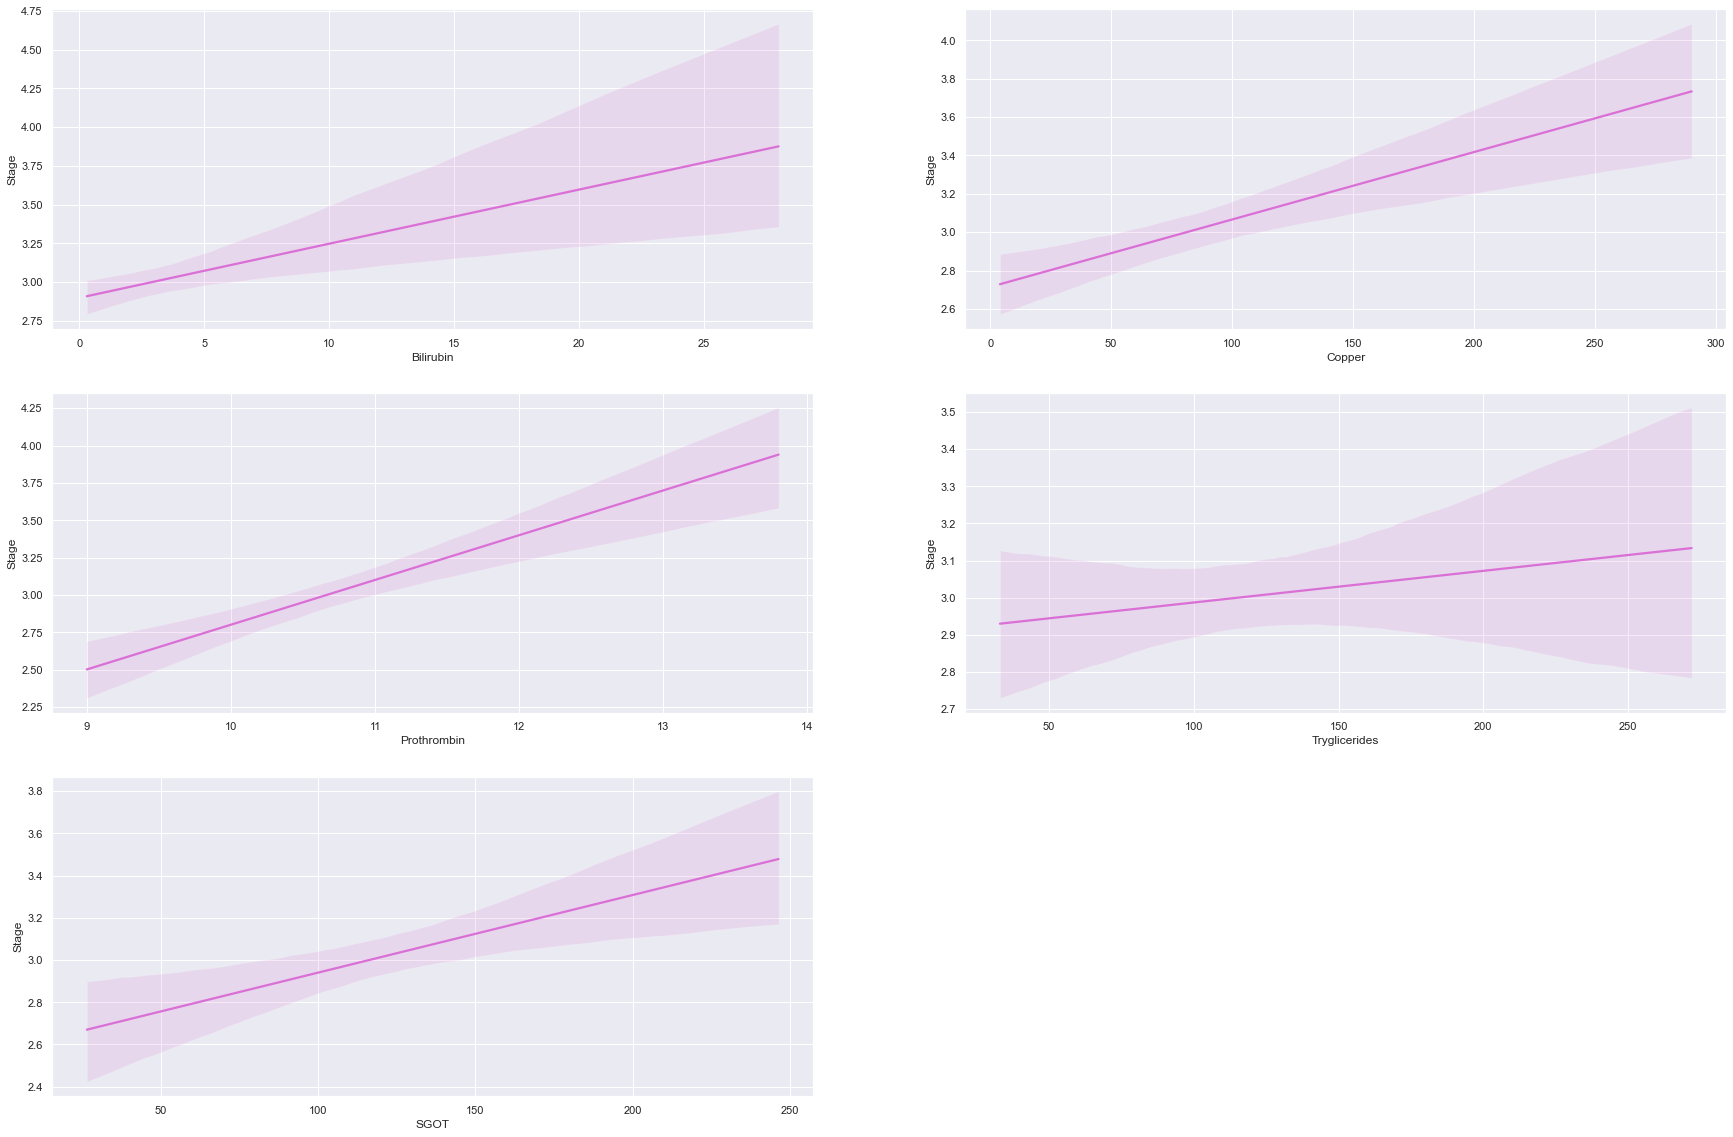

In [23]:
plt.figure(figsize = (30,20)) 
loop = liverData[["Bilirubin","Copper",'Prothrombin',"Tryglicerides","SGOT"]] 
i = 0 
for c in loop: 
    i +=1 
    plt.subplot(3,2,i) 
    sns.regplot(x = liverData[c],y = liverData["Stage"],scatter=False, color='orchid',)

The factors "Bilirubin", "Copper", "Prothrombin", "Tryglicerides" and "SGOT" show a positive correlation wuth liver cirrhosis. 

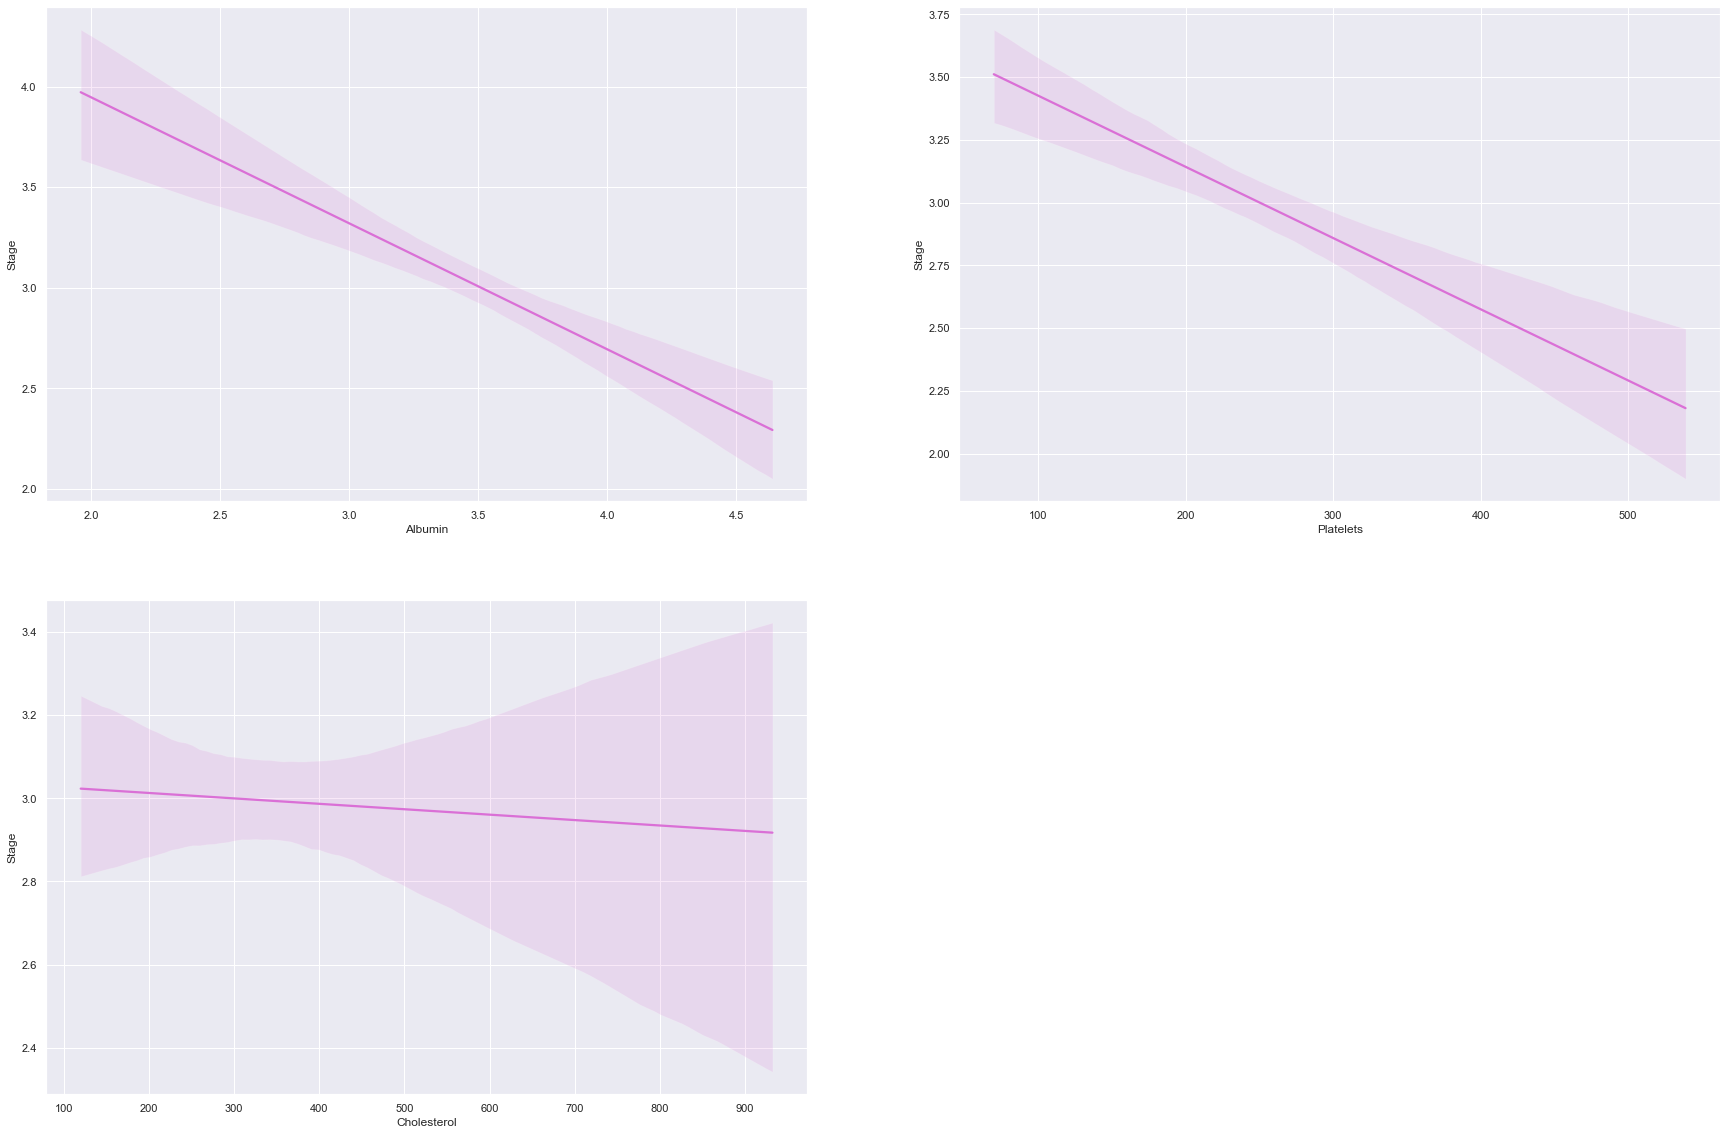

In [24]:
plt.figure(figsize = (30,20)) 
loop = liverData[["Albumin","Platelets","Cholesterol"]] 
i = 0 
for c in loop: 
    i +=1 
    plt.subplot(2,2,i) 
    sns.regplot(x = liverData[c],y = liverData["Stage"],scatter=False, color='orchid')

While, the factors "Albumin", "Platelets" and "Cholesterol" show a negative correlation with liver cirrhosis. 

From above, we have observed that females tend to have a higher tendency of developing liver cirrhosis than males. As such, in the next few lines of code, we are seeing which factors contribute the most to this phenomena. 

Text(0.5, 1.0, 'Correlation of gender with SGOT')

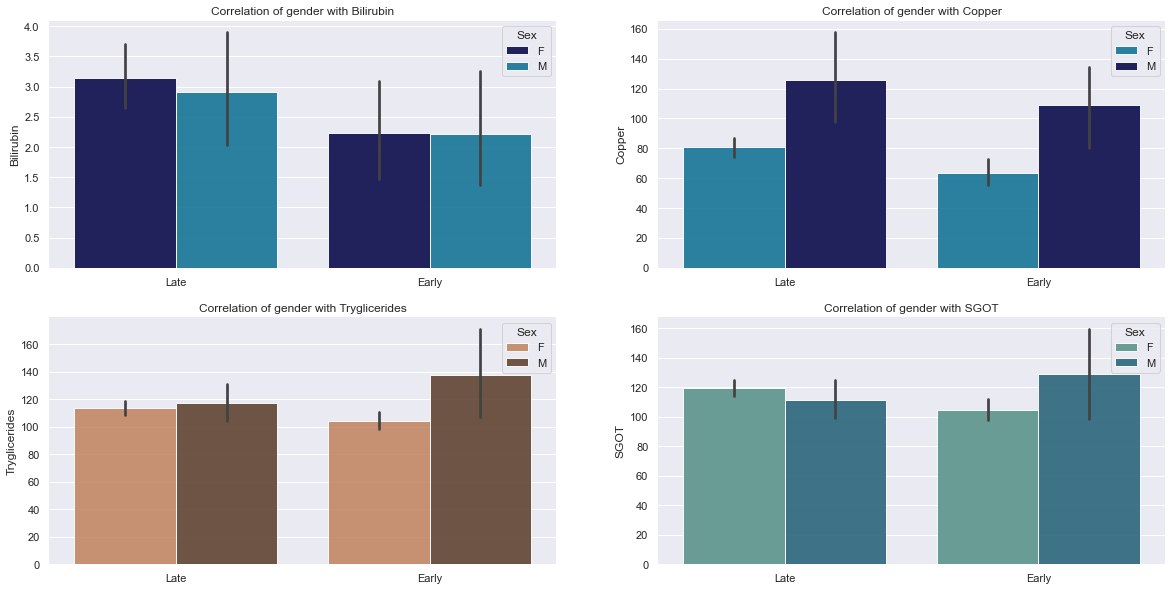

In [25]:
plt.figure(figsize=(20,10))



plt.subplot(2,2,1)
sns.barplot(x=liverData['Early/Late Stage'],y = liverData["Bilirubin"],hue=liverData['Sex'], palette='ocean', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Correlation of gender with Bilirubin')


plt.subplot(2,2,2)
sns.barplot(x=liverData['Early/Late Stage'],y = liverData["Copper"],hue=liverData['Sex'], palette='ocean_r', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Correlation of gender with Copper')

plt.subplot(2,2,3)
sns.barplot(x=liverData['Early/Late Stage'],y = liverData["Tryglicerides"],hue=liverData['Sex'], palette='copper_r', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Correlation of gender with Tryglicerides')


plt.subplot(2,2,4)
sns.barplot(x=liverData['Early/Late Stage'],y = liverData["SGOT"],hue=liverData['Sex'], palette='crest', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Correlation of gender with SGOT')


Text(0.5, 1.0, 'Correlation of gender with Prothrombin')

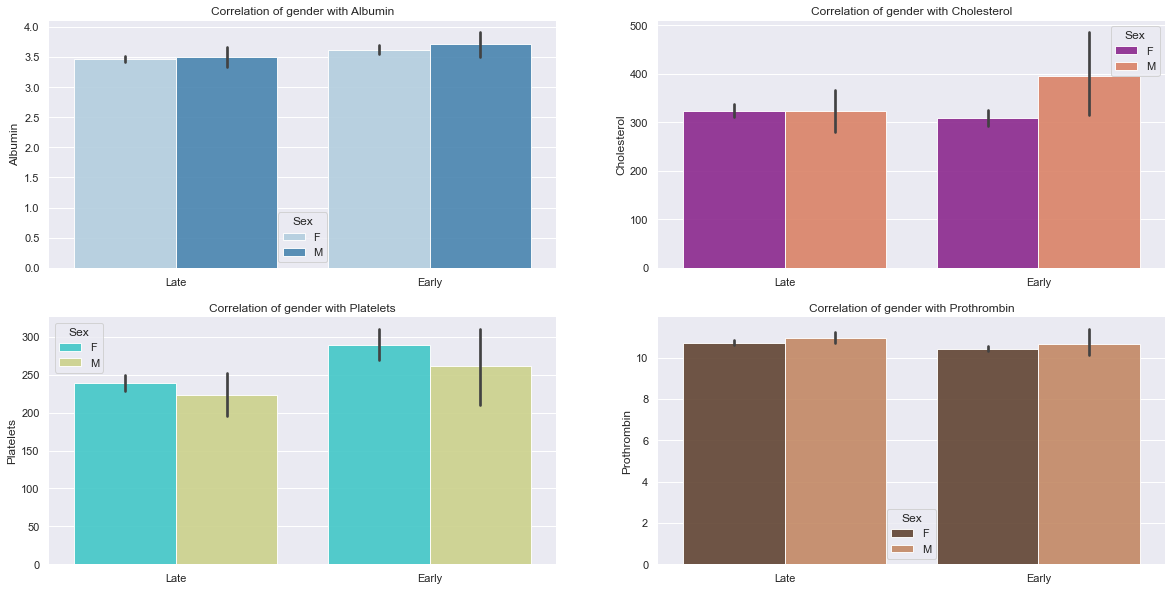

In [26]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.barplot(x=liverData['Early/Late Stage'],y = liverData["Albumin"],hue=liverData['Sex'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Correlation of gender with Albumin')


plt.subplot(2,2,2)
sns.barplot(x=liverData['Early/Late Stage'],y = liverData["Cholesterol"],hue=liverData['Sex'], palette='plasma', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Correlation of gender with Cholesterol')

plt.subplot(2,2,3)
sns.barplot(x=liverData['Early/Late Stage'],y = liverData["Platelets"],hue=liverData['Sex'], palette='rainbow', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Correlation of gender with Platelets')

plt.subplot(2,2,4)
sns.barplot(x=liverData['Early/Late Stage'],y = liverData["Prothrombin"],hue=liverData['Sex'], palette='copper', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Correlation of gender with Prothrombin' )

The factors "SGOT" and "Tryglicerides" provide us with conflicting results that do not follow the correlations we have found above. 
However, the factors "Bilirubin", "Copper", "Albumin" and "Platelets" strongly support our earlier findings. 

# Step 3: Exploratory Data Analysis 

### Processing the data. 

In [27]:
liverData["Sex"].replace("M", 0, inplace=True)
liverData["Sex"].replace("F",1,inplace = True)
liverData["Hepatomegaly"].replace("Y", 1, inplace=True)
liverData["Hepatomegaly"].replace("N", 0, inplace=True)
liverData["Ascites"].replace("Y", 1, inplace=True)
liverData["Ascites"].replace("N", 0, inplace=True)
liverData["Edema"].replace("Y", 1, inplace=True)
liverData["Edema"].replace("N", 0, inplace=True)
liverData["Edema"].replace("S", 0, inplace=True)
liverData["Status"].replace("CL", 0, inplace=True)
liverData["Status"].replace("C", 1, inplace=True)
liverData["Status"].replace("D", 0, inplace=True)
liverData["Drug"].replace("D-penicillamine", 1, inplace=True)
liverData["Drug"].replace("Placebo", 0, inplace=True)
liverData["Spiders"].replace("Y", 1, inplace=True)
liverData["Spiders"].replace("N", 0, inplace=True)
liverData["Early/Late Stage"].replace("Early", 0, inplace=True)
liverData["Early/Late Stage"].replace("Late", 1, inplace=True)

In [28]:
print(liverData)

     N_Days  Status  Drug   Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
0       400       0     1  58.8    1        1             1        1      1   
1      4500       1     1  56.5    1        0             1        1      0   
2      1012       0     1  70.1    0        0             0        0      0   
3      1925       0     1  54.8    1        0             1        1      0   
4      1504       0     0  38.1    1        0             1        1      0   
..      ...     ...   ...   ...  ...      ...           ...      ...    ...   
413     681       0     1  67.0    1        0             1        0      0   
414    1103       1     1  39.0    1        0             1        0      0   
415    1055       1     1  57.0    1        0             1        0      0   
416     691       1     1  58.0    1        0             1        0      0   
417     976       1     1  53.0    1        0             1        0      0   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_P

In [29]:
Drug=liverData[["Drug"]]
ELStage=liverData[["Early/Late Stage"]]
Age=liverData[["Age"]]
Sex=liverData[["Sex"]]
Ascites=liverData[["Ascites"]]
Hepatomegaly=liverData[["Hepatomegaly"]]
Spiders=liverData[["Spiders"]]
Edema=liverData[["Edema"]]
Bilirubin=liverData[["Bilirubin"]]
Cholesterol=liverData[["Cholesterol"]]
Albumin=liverData[["Albumin"]]
Copper=liverData[["Copper"]]
AlkPhos=liverData[["Alk_Phos"]]
SGOT=liverData[["SGOT"]]
Tryglicerides=liverData[["Tryglicerides"]]
Platelets=liverData[["Platelets"]]
Prothrombin=liverData[["Prothrombin"]]
Stage=liverData[["Stage"]]

### Decision Tree Classifier for discrete data 

Train set:  (295, 1) (295, 1)
Test set:  (74, 1) (74, 1)


[Text(0.5, 0.75, 'Drug <= 0.5\ngini = 0.469\nsamples = 295\nvalue = [111, 184]\nclass = Y'),
 Text(0.25, 0.25, 'gini = 0.433\nsamples = 85\nvalue = [27, 58]\nclass = Y'),
 Text(0.75, 0.25, 'gini = 0.48\nsamples = 210\nvalue = [84, 126]\nclass = Y')]

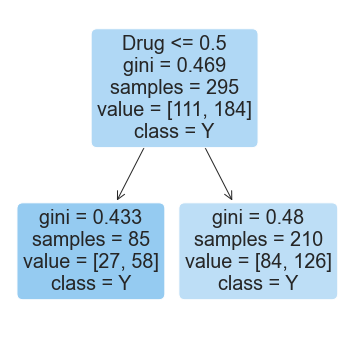

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(Drug, ELStage, test_size = 0.2)

print("Train set: ", x_train.shape, y_train.shape)
print("Test set: ", x_test.shape, y_test.shape)

dectree1 = DecisionTreeClassifier(max_depth = 4)
dectree1.fit(y_train, x_train)

from sklearn.tree import plot_tree

f = plt.figure(figsize=(6,6))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["Drug"], 
          class_names=["N","Y"])

Train set:  (295, 1) (295, 1)
Test set:  (74, 1) (74, 1)


[Text(0.5, 0.75, 'Sex <= 0.5\ngini = 0.193\nsamples = 295\nvalue = [32, 263]\nclass = Y'),
 Text(0.25, 0.25, 'gini = 0.198\nsamples = 90\nvalue = [10, 80]\nclass = Y'),
 Text(0.75, 0.25, 'gini = 0.192\nsamples = 205\nvalue = [22, 183]\nclass = Y')]

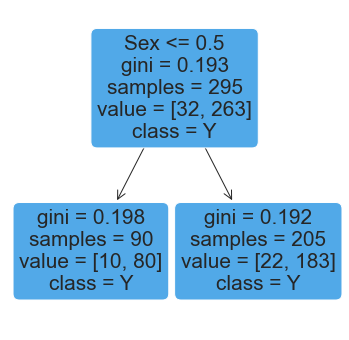

In [31]:
x_train, x_test, y_train, y_test = train_test_split(Sex, ELStage, test_size = 0.2)

print("Train set: ", x_train.shape, y_train.shape)
print("Test set: ", x_test.shape, y_test.shape)

dectree1 = DecisionTreeClassifier(max_depth = 4)
dectree1.fit(y_train, x_train)

from sklearn.tree import plot_tree

f = plt.figure(figsize=(6,6))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["Sex"], 
          class_names=["N","Y"])

Train set:  (295, 1) (295, 1)
Test set:  (74, 1) (74, 1)


[Text(0.5, 0.75, 'Ascites <= 0.5\ngini = 0.097\nsamples = 295\nvalue = [280, 15]\nclass = N'),
 Text(0.25, 0.25, 'gini = 0.044\nsamples = 89\nvalue = [87, 2]\nclass = N'),
 Text(0.75, 0.25, 'gini = 0.118\nsamples = 206\nvalue = [193, 13]\nclass = N')]

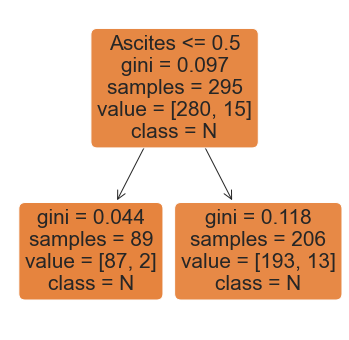

In [32]:
x_train, x_test, y_train, y_test = train_test_split(Ascites, ELStage, test_size = 0.2)

print("Train set: ", x_train.shape, y_train.shape)
print("Test set: ", x_test.shape, y_test.shape)

dectree1 = DecisionTreeClassifier(max_depth = 4)
dectree1.fit(y_train, x_train)

from sklearn.tree import plot_tree

f = plt.figure(figsize=(6,6))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["Ascites"], 
          class_names=["N","Y"])

Train set:  (295, 1) (295, 1)
Test set:  (74, 1) (74, 1)


[Text(0.5, 0.75, 'Hepatomegaly <= 0.5\ngini = 0.466\nsamples = 295\nvalue = [109, 186]\nclass = Y'),
 Text(0.25, 0.25, 'gini = 0.492\nsamples = 89\nvalue = [50, 39]\nclass = N'),
 Text(0.75, 0.25, 'gini = 0.409\nsamples = 206\nvalue = [59, 147]\nclass = Y')]

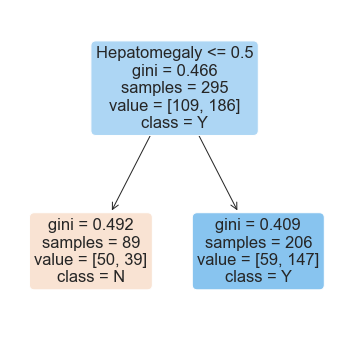

In [33]:
x_train, x_test, y_train, y_test = train_test_split(Hepatomegaly, ELStage, test_size = 0.2)

print("Train set: ", x_train.shape, y_train.shape)
print("Test set: ", x_test.shape, y_test.shape)

dectree1 = DecisionTreeClassifier(max_depth = 4)
dectree1.fit(y_train, x_train)

from sklearn.tree import plot_tree

f = plt.figure(figsize=(6,6))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["Hepatomegaly"], 
          class_names=["N","Y"])

Train set:  (295, 1) (295, 1)
Test set:  (74, 1) (74, 1)


[Text(0.5, 0.75, 'Spiders <= 0.5\ngini = 0.299\nsamples = 295\nvalue = [241, 54]\nclass = N'),
 Text(0.25, 0.25, 'gini = 0.116\nsamples = 81\nvalue = [76, 5]\nclass = N'),
 Text(0.75, 0.25, 'gini = 0.353\nsamples = 214\nvalue = [165, 49]\nclass = N')]

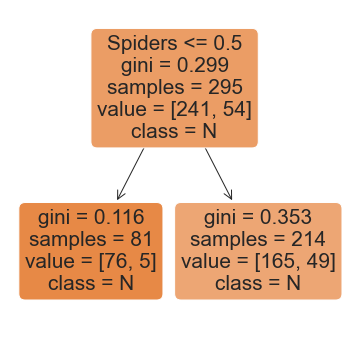

In [34]:
x_train, x_test, y_train, y_test = train_test_split(Spiders, ELStage, test_size = 0.2)

print("Train set: ", x_train.shape, y_train.shape)
print("Test set: ", x_test.shape, y_test.shape)

dectree1 = DecisionTreeClassifier(max_depth = 4)
dectree1.fit(y_train, x_train)

from sklearn.tree import plot_tree

f = plt.figure(figsize=(6,6))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["Spiders"], 
          class_names=["N","Y"])

Train set:  (295, 1) (295, 1)
Test set:  (74, 1) (74, 1)


[Text(0.5, 0.75, 'Edema <= 0.5\ngini = 0.084\nsamples = 295\nvalue = [282, 13]\nclass = N'),
 Text(0.25, 0.25, 'gini = 0.022\nsamples = 88\nvalue = [87, 1]\nclass = N'),
 Text(0.75, 0.25, 'gini = 0.109\nsamples = 207\nvalue = [195, 12]\nclass = N')]

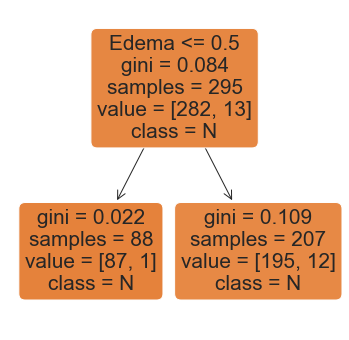

In [35]:
x_train, x_test, y_train, y_test = train_test_split(Edema, ELStage, test_size = 0.2)

print("Train set: ", x_train.shape, y_train.shape)
print("Test set: ", x_test.shape, y_test.shape)

dectree1 = DecisionTreeClassifier(max_depth = 4)
dectree1.fit(y_train, x_train)

from sklearn.tree import plot_tree

f = plt.figure(figsize=(6,6))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["Edema"], 
          class_names=["N","Y"])

A low gini index indicates that the particular factor is not significant in determining the stage. From the above, we can identify that "Ascites", "Edema" and "Spiders" have a low gini index, thus they are not significant factors. 

### Bar plot for continuous data 

<AxesSubplot:xlabel='Early/Late Stage', ylabel='Bilirubin'>

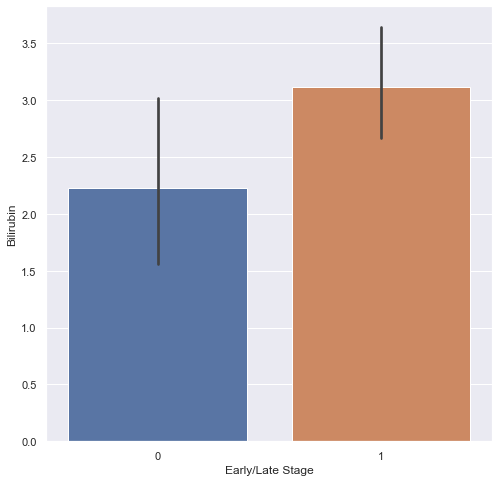

In [36]:
DF = pd.concat([ELStage,Bilirubin], axis = 1).reindex(ELStage.index)
plt.figure(figsize=(8,8))
sns.barplot(data=DF, x ="Early/Late Stage", y = "Bilirubin")

<AxesSubplot:xlabel='Early/Late Stage', ylabel='Cholesterol'>

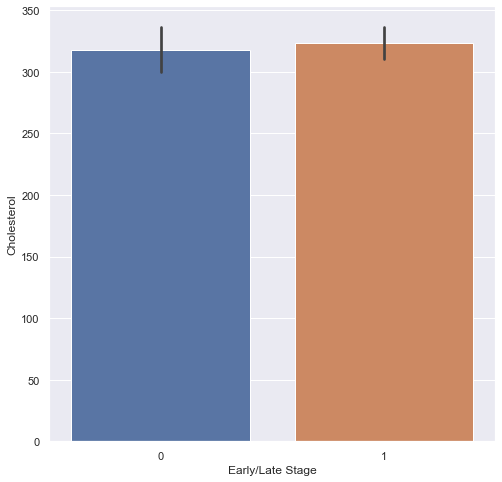

In [37]:
DF = pd.concat([ELStage,Cholesterol], axis = 1).reindex(ELStage.index)
plt.figure(figsize=(8,8))
sns.barplot(data=DF, x ="Early/Late Stage", y = "Cholesterol")

<AxesSubplot:xlabel='Early/Late Stage', ylabel='Albumin'>

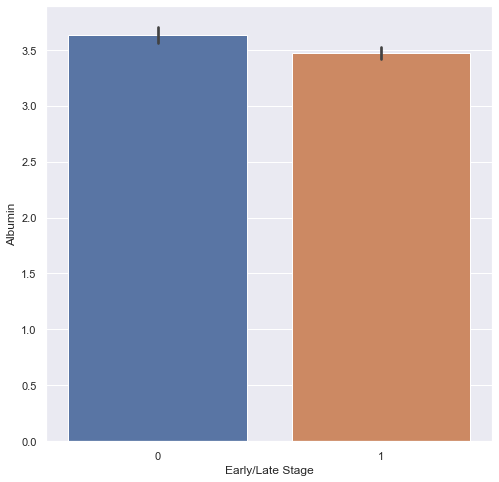

In [38]:
DF = pd.concat([ELStage,Albumin], axis = 1).reindex(ELStage.index)
plt.figure(figsize=(8,8))
sns.barplot(data=DF, x ="Early/Late Stage", y = "Albumin")

<AxesSubplot:xlabel='Early/Late Stage', ylabel='Copper'>

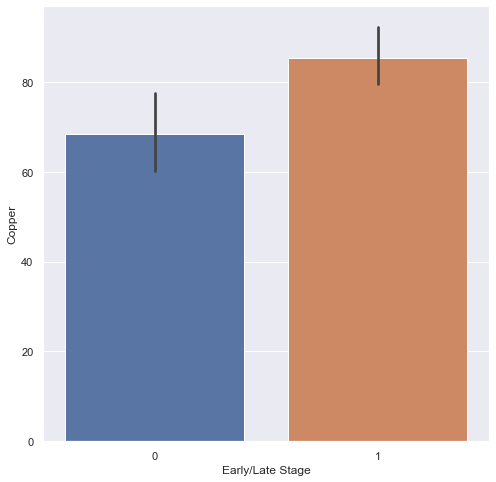

In [39]:
DF = pd.concat([ELStage,Copper], axis = 1).reindex(ELStage.index)
plt.figure(figsize=(8,8))
sns.barplot(data=DF, x ="Early/Late Stage", y = "Copper")

<AxesSubplot:xlabel='Early/Late Stage', ylabel='Alk_Phos'>

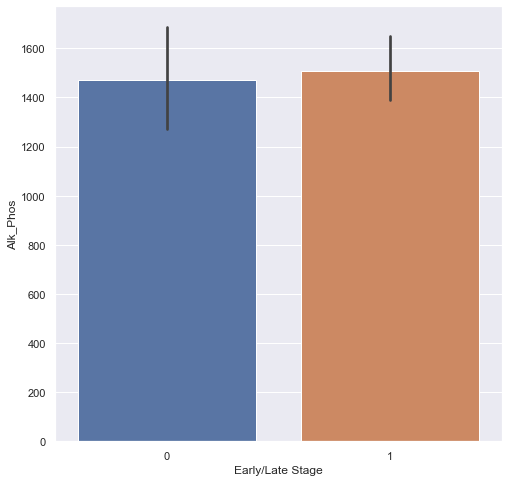

In [40]:
DF = pd.concat([ELStage,AlkPhos], axis = 1).reindex(ELStage.index)
plt.figure(figsize=(8,8))
sns.barplot(data=DF, x ="Early/Late Stage", y = "Alk_Phos")

<AxesSubplot:xlabel='Early/Late Stage', ylabel='SGOT'>

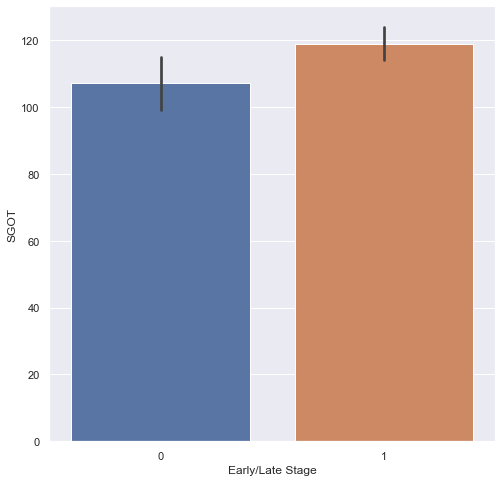

In [41]:
DF = pd.concat([ELStage,SGOT], axis = 1).reindex(ELStage.index)
plt.figure(figsize=(8,8))
sns.barplot(data=DF, x ="Early/Late Stage", y = "SGOT")

<AxesSubplot:xlabel='Early/Late Stage', ylabel='Tryglicerides'>

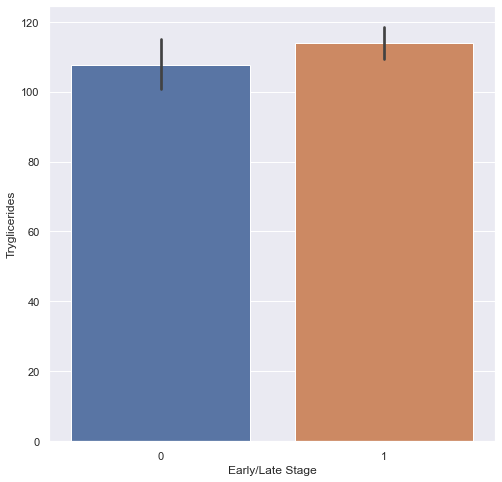

In [42]:
DF = pd.concat([ELStage,Tryglicerides], axis = 1).reindex(ELStage.index)
plt.figure(figsize=(8,8))
sns.barplot(data=DF, x ="Early/Late Stage", y = "Tryglicerides")

<AxesSubplot:xlabel='Early/Late Stage', ylabel='Platelets'>

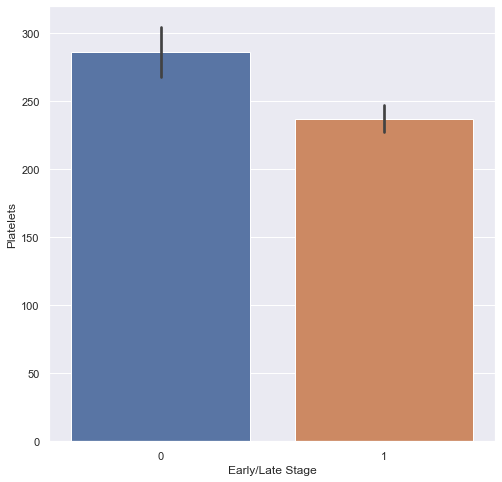

In [43]:
DF = pd.concat([ELStage,Platelets], axis = 1).reindex(ELStage.index)
plt.figure(figsize=(8,8))
sns.barplot(data=DF, x ="Early/Late Stage", y = "Platelets")

<AxesSubplot:xlabel='Early/Late Stage', ylabel='Prothrombin'>

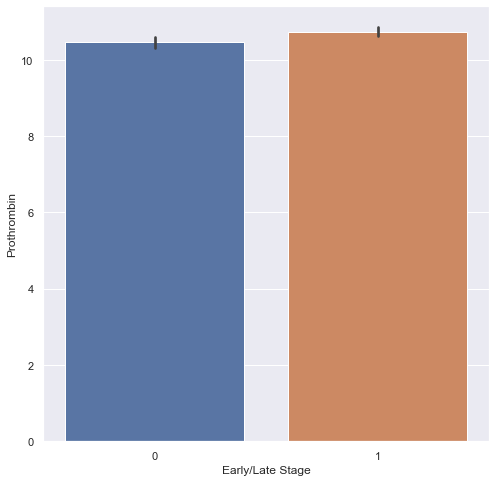

In [44]:
DF = pd.concat([ELStage,Prothrombin], axis = 1).reindex(ELStage.index)
plt.figure(figsize=(8,8))
sns.barplot(data=DF, x ="Early/Late Stage", y = "Prothrombin")

# Step 4: Selecting a Machine Learning Model

We want to select a Machine Learning Model which has the highest accuracy rate. 

In [45]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
model  = RandomForestClassifier(n_estimators = 100,max_depth = 12,random_state = 0)
skf = StratifiedKFold(n_splits = 10,shuffle = True,random_state = 10)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver='lbfgs', max_iter=3000)

from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=10)

from sklearn.ensemble import BaggingClassifier
model4 = BaggingClassifier(
    n_estimators=100,oob_score=True)

In [46]:
liverData["Early/Late Stage"].replace("Early", 0, inplace=True)
liverData["Early/Late Stage"].replace("Late", 1, inplace=True)

### Model 1: Random Forest Classifier 

In [47]:
# model  = RandomForestClassifier(n_estimators = 100,max_depth = 12,random_state = 0)
# skf = StratifiedKFold(n_splits = 10,shuffle = True,random_state = 10)

X = liverData.drop(['Status', 'Stage', 'Early/Late Stage', 'N_Days'],axis = 1)
y = liverData['Early/Late Stage']

acc = []
score = 0

for train_index,test_index in skf.split(X,y):
    train = X.iloc[train_index,:]
    test = X.iloc[test_index,:]
    x_train = train
    x_test = test
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    model.fit(x_train,y_train)
    score = model.score(x_test,y_test)
    acc.append(score)
    print(score)
print("Percentage of Random Forest Classifier is")
print(np.mean(acc)*100)  

0.6756756756756757
0.5945945945945946
0.7027027027027027
0.6486486486486487
0.7837837837837838
0.6216216216216216
0.7297297297297297
0.7027027027027027
0.5675675675675675
0.75
Percentage of Random Forest Classifier is
67.77027027027027


Text(48.5, 0.5, 'Truth')

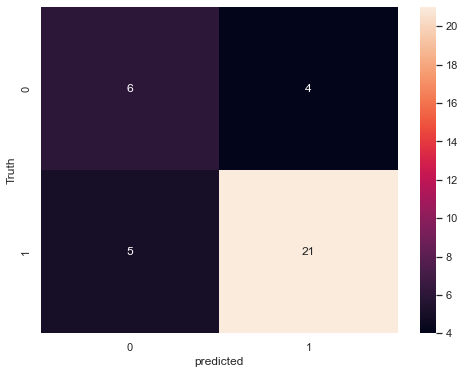

In [48]:
#confusion matrix for random forest 
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)


plt.figure(figsize = (8,6))
sns.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define the hyperparameters for the Random Forest Classifier
n_estimators = 100
max_depth = 12
random_state = 0

# Define the number of folds for cross-validation
n_splits = 10

# Create a list to store the accuracies for each variable
var_acc = []

# Loop through each variable in the dataset
for col in X.columns:
    # Define the features and target for the current variable
    X_col = X[[col]]
    y_col = y
    
    # Define the Random Forest Classifier with the specified hyperparameters
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    
    # Define the cross-validation strategy
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Create a list to store the accuracies for this variable across all folds
    acc = []
    
    # Loop through each fold in the cross-validation strategy
    for train_index, test_index in skf.split(X_col, y_col):
        # Split the data into training and testing sets for this fold
        X_train = X_col.iloc[train_index,:]
        X_test = X_col.iloc[test_index,:]
        y_train = y_col.iloc[train_index]
        y_test = y_col.iloc[test_index]
        
        # Fit the Random Forest Classifier on the training data for this fold
        model.fit(X_train, y_train)
        
        # Compute the accuracy of the model on the testing data for this fold
        score = model.score(X_test, y_test)
        
        # Add the accuracy to the list of accuracies for this variable
        acc.append(score)
    
    # Compute the average accuracy across all folds for this variable
    var_score = np.mean(acc)
    
    # Add the average accuracy to the list of accuracies for all variables
    var_acc.append(var_score)
    
    # Print the average accuracy for this variable
    print(f"Accuracy for {col}: {var_score:.2f}")
    
# Print the list of accuracies for all variables
print(var_acc)

Accuracy for Drug: 0.71
Accuracy for Age: 0.66
Accuracy for Sex: 0.71
Accuracy for Ascites: 0.71
Accuracy for Hepatomegaly: 0.71
Accuracy for Spiders: 0.71
Accuracy for Edema: 0.71
Accuracy for Bilirubin: 0.67
Accuracy for Cholesterol: 0.64
Accuracy for Albumin: 0.60
Accuracy for Copper: 0.62
Accuracy for Alk_Phos: 0.65
Accuracy for SGOT: 0.66
Accuracy for Tryglicerides: 0.68
Accuracy for Platelets: 0.63
Accuracy for Prothrombin: 0.70
[0.7073573573573574, 0.6583333333333334, 0.7073573573573574, 0.7073573573573574, 0.7073573573573574, 0.7073573573573574, 0.7073573573573574, 0.6693693693693693, 0.6398648648648649, 0.601876876876877, 0.6177927927927928, 0.6478228228228229, 0.663888888888889, 0.683033033033033, 0.6341591591591591, 0.6965465465465466]


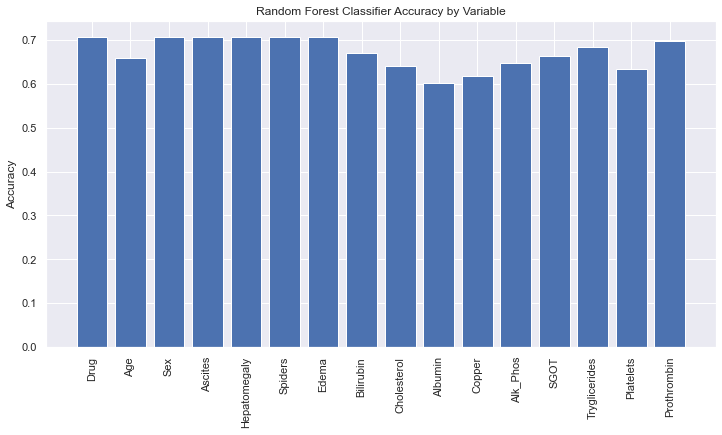

In [50]:
import matplotlib.pyplot as plt

# Create a list of variable names
var_names = X.columns.tolist()

# Create a bar plot of the variable accuracies
plt.figure(figsize=(12, 6))
plt.bar(var_names, var_acc)
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy by Variable')
plt.show()

### Model 2: Logistic Regression Model 

In [51]:
from sklearn.linear_model import LogisticRegression
# model2 = LogisticRegression(solver='lbfgs', max_iter=3000)

acc2 = []

for train_index,test_index in skf.split(X,y):
    train = X.iloc[train_index,:]
    test = X.iloc[test_index,:]
    x_train = train
    x_test = test
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    model2.fit(x_train,y_train)
    score = model2.score(x_test,y_test)
    acc2.append(score)
    print(score)
print("Percentage of logistic_regression is")
print(np.mean(acc2)*100)

0.6756756756756757
0.6756756756756757
0.7297297297297297
0.6756756756756757
0.6486486486486487
0.8378378378378378
0.7567567567567568
0.7567567567567568
0.7567567567567568
0.6388888888888888
Percentage of logistic_regression is
71.52402402402402


Text(48.5, 0.5, 'Truth')

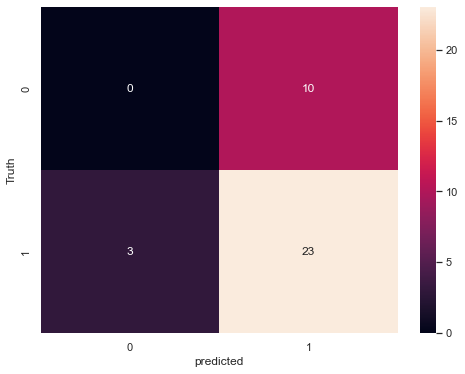

In [52]:
y_predicted = model2.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)


plt.figure(figsize = (8,6))
sns.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")

Accuracy for Drug: 0.71
Accuracy for Age: 0.71
Accuracy for Sex: 0.71
Accuracy for Ascites: 0.71
Accuracy for Hepatomegaly: 0.71
Accuracy for Spiders: 0.71
Accuracy for Edema: 0.71
Accuracy for Bilirubin: 0.71
Accuracy for Cholesterol: 0.71
Accuracy for Albumin: 0.71
Accuracy for Copper: 0.71
Accuracy for Alk_Phos: 0.71
Accuracy for SGOT: 0.71
Accuracy for Tryglicerides: 0.71
Accuracy for Platelets: 0.73
Accuracy for Prothrombin: 0.71
[0.7073573573573574, 0.7073573573573574, 0.7073573573573574, 0.7073573573573574, 0.7073573573573574, 0.7073573573573574, 0.7073573573573574, 0.7073573573573574, 0.7073573573573574, 0.7100600600600601, 0.7073573573573574, 0.7073573573573574, 0.7073573573573574, 0.7073573573573574, 0.7262762762762762, 0.7073573573573574]


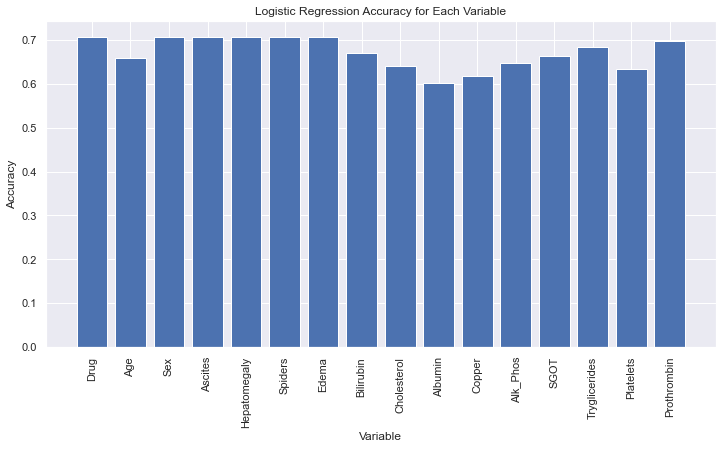

In [53]:
import matplotlib.pyplot as plt

# Define the logistic regression model
model2 = LogisticRegression(solver='lbfgs', max_iter=3000)

# Create a list to store the accuracies for each variable
var_acc2 = []

# Loop through each variable in the dataset
for col in X.columns:
    # Define the features and target for the current variable
    X_col = X[[col]]
    y_col = y
    
   
    
    # Define the logistic regression model with default hyperparameters
    model2 = LogisticRegression(solver='lbfgs', max_iter=3000)
    
    # Define the cross-validation strategy
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Create a list to store the accuracies for this variable across all folds
    acc = []
    
    # Loop through each fold in the cross-validation strategy
    for train_index, test_index in skf.split(X_col, y_col):
        # Split the data into training and testing sets for this fold
        X_train = X_col.iloc[train_index,:]
        X_test = X_col.iloc[test_index,:]
        y_train = y_col.iloc[train_index]
        y_test = y_col.iloc[test_index]
        
        # Fit the logistic regression model on the training data for this fold
        model2.fit(X_train, y_train)
        
        # Compute the accuracy of the model on the testing data for this fold
        score = model2.score(X_test, y_test)
        
        # Add the accuracy to the list of accuracies for this variable
        acc.append(score)
    
    # Compute the average accuracy across all folds for this variable
    var_score = np.mean(acc)
    
    # Add the average accuracy to the list of accuracies for all variables
    var_acc2.append(var_score)
    
    # Print the average accuracy for this variable
    print(f"Accuracy for {col}: {var_score:.2f}")
    
# Print the list of accuracies for all variables
print(var_acc2)
plt.figure(figsize=(12, 6))
plt.bar(X.columns, var_acc)
plt.title("Logistic Regression Accuracy for Each Variable")
plt.xlabel("Variable")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.show()

### Model 3: K-Nearest Neighbour Classifier 

In [54]:
acc3 = []

for train_index,test_index in skf.split(X,y):
    train = X.iloc[train_index,:]
    test = X.iloc[test_index,:]
    x_train = train
    x_test = test
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    model3.fit(x_train,y_train)
    score = model3.score(x_test,y_test)
    acc3.append(score)
    print(score)
print("Percentage of KNNeighborClassifier is")
print(np.mean(acc3)*100)  

0.6486486486486487
0.6216216216216216
0.6216216216216216
0.5945945945945946
0.7297297297297297
0.7297297297297297
0.6756756756756757
0.7297297297297297
0.7567567567567568
0.75
Percentage of KNNeighborClassifier is
68.58108108108108


Text(48.5, 0.5, 'Truth')

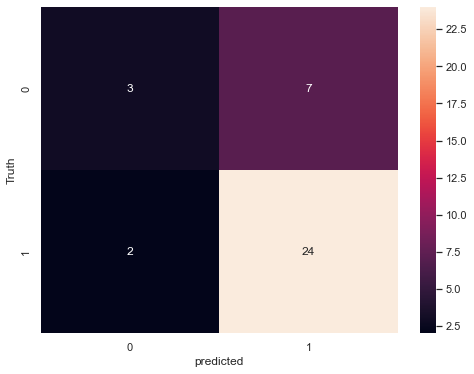

In [55]:
#confusion matrix for KNN 
y_predicted = model3.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)


plt.figure(figsize = (8,6))
sns.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")

Accuracy for Drug: 0.71
Accuracy for Age: 0.64
Accuracy for Sex: 0.71
Accuracy for Ascites: 0.71
Accuracy for Hepatomegaly: 0.70
Accuracy for Spiders: 0.68
Accuracy for Edema: 0.71
Accuracy for Bilirubin: 0.65
Accuracy for Cholesterol: 0.63
Accuracy for Albumin: 0.63
Accuracy for Copper: 0.59
Accuracy for Alk_Phos: 0.66
Accuracy for SGOT: 0.69
Accuracy for Tryglicerides: 0.64
Accuracy for Platelets: 0.65
Accuracy for Prothrombin: 0.65


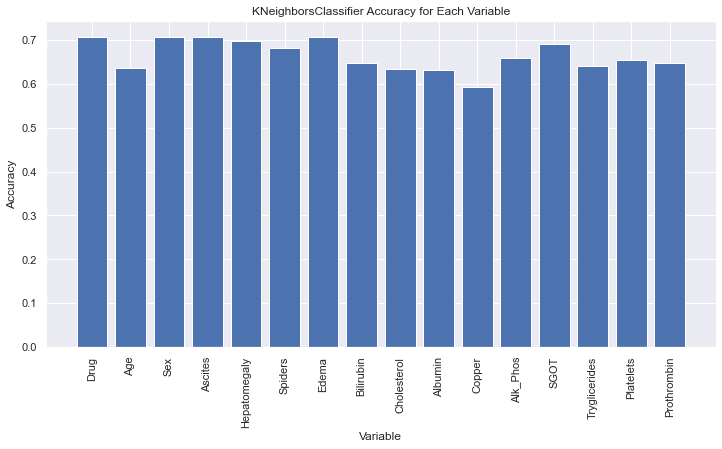

In [56]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Define the hyperparameters for the KNeighborsClassifier
n_neighbors = 5

# Define the number of folds for cross-validation
n_splits = 10

# Create a list to store the accuracies for each variable
var_acc = []

# Loop through each variable in the dataset
for col in X.columns:
    # Define the features and target for the current variable
    X_col = X[[col]]
    y_col = y
    
    # Define the KNeighborsClassifier with the specified hyperparameters
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Define the cross-validation strategy
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Create a list to store the accuracies for this variable across all folds
    acc = []
    
    # Loop through each fold in the cross-validation strategy
    for train_index, test_index in skf.split(X_col, y_col):
        # Split the data into training and testing sets for this fold
        X_train = X_col.iloc[train_index,:]
        X_test = X_col.iloc[test_index,:]
        y_train = y_col.iloc[train_index]
        y_test = y_col.iloc[test_index]
        
        # Fit the KNeighborsClassifier on the training data for this fold
        model.fit(X_train, y_train)
        
        # Compute the accuracy of the model on the testing data for this fold
        score = model.score(X_test, y_test)
        
        # Add the accuracy to the list of accuracies for this variable
        acc.append(score)
    
    # Compute the average accuracy across all folds for this variable
    var_score = np.mean(acc)
    
    # Add the average accuracy to the list of accuracies for all variables
    var_acc.append(var_score)
    
    # Print the average accuracy for this variable
    print(f"Accuracy for {col}: {var_score:.2f}")
    
   

# Plot the list of accuracies for all variables as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(X.columns, var_acc)
plt.title("KNeighborsClassifier Accuracy for Each Variable")
plt.xlabel("Variable")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.show()

### Model 4: Bagging Classifier 

In [57]:
acc4 = []

for train_index,test_index in skf.split(X,y):
    train = X.iloc[train_index,:]
    test = X.iloc[test_index,:]
    x_train = train
    x_test = test
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    model4.fit(x_train,y_train)
    score4 = model4.oob_score_
    acc4.append(score4)
    print(score4)
print("Percentage of BaggingClassifier is")
print(np.mean(acc4)*100) 
    

0.6445783132530121
0.6807228915662651
0.6686746987951807
0.6746987951807228
0.6596385542168675
0.6656626506024096
0.6716867469879518
0.6656626506024096
0.6265060240963856
0.6636636636636637
Percentage of BaggingClassifier is
66.21494988964868


Text(48.5, 0.5, 'Truth')

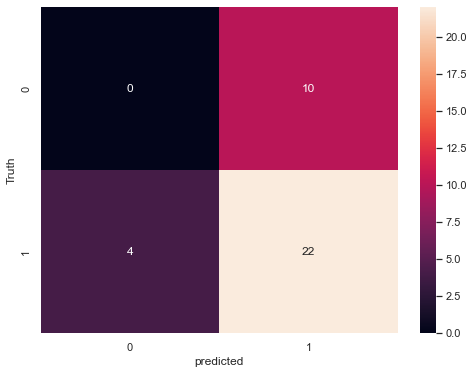

In [58]:
y_predicted = model4.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)


plt.figure(figsize = (8,6))
sns.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")

Bagging Accuracy  for Drug: 0.71
Bagging Accuracy  for Age: 0.62
Bagging Accuracy  for Sex: 0.71
Bagging Accuracy  for Ascites: 0.71
Bagging Accuracy  for Hepatomegaly: 0.71
Bagging Accuracy  for Spiders: 0.71
Bagging Accuracy  for Edema: 0.71
Bagging Accuracy  for Bilirubin: 0.62
Bagging Accuracy  for Cholesterol: 0.62
Bagging Accuracy  for Albumin: 0.62
Bagging Accuracy  for Copper: 0.61
Bagging Accuracy  for Alk_Phos: 0.64
Bagging Accuracy  for SGOT: 0.65
Bagging Accuracy  for Tryglicerides: 0.66
Bagging Accuracy  for Platelets: 0.60
Bagging Accuracy  for Prothrombin: 0.71


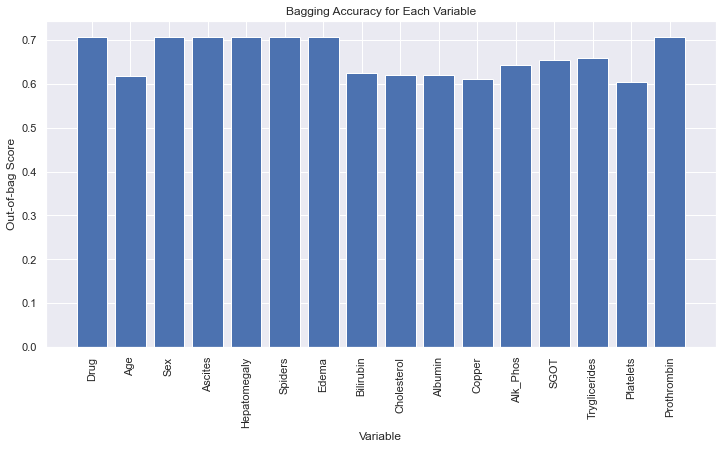

In [59]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Define the hyperparameters for the BaggingClassifier
n_estimators = 100
max_samples = 1.0
max_features = 1.0
random_state = 0

# Define the number of folds for cross-validation
n_splits = 10

# Create a list to store the accuracies for each variable
var_acc = []

# Loop through each variable in the dataset
for col in X.columns:
    # Define the features and target for the current variable
    X_col = X[[col]]
    y_col = y
    
    # Define the BaggingClassifier with the specified hyperparameters
    model = BaggingClassifier(n_estimators=n_estimators, max_samples=max_samples, max_features=max_features, oob_score=True, random_state=random_state)
    
    # Fit the BaggingClassifier on the data for this variable
    model.fit(X_col, y_col)
    
    # Compute the out-of-bag score for this variable
    var_score = model.oob_score_
    
    # Add the out-of-bag score to the list of accuracies for all variables
    var_acc.append(var_score)
    
    # Print the out-of-bag score for this variable
    print(f"Bagging Accuracy  for {col}: {var_score:.2f}")

    
# Create a bar plot to show the out-of-bag scores for all variables
plt.figure(figsize=(12, 6))
plt.bar(X.columns, var_acc)
plt.title("Bagging Accuracy for Each Variable")
plt.xlabel("Variable")
plt.ylabel("Out-of-bag Score")
plt.xticks(rotation=90)
plt.show()

In [60]:
liverData["Early/Late Stage"].replace("Early", 0, inplace=True)
liverData["Early/Late Stage"].replace("Late", 1, inplace=True)

In [61]:
import warnings
import itertools

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from colorama import Fore, Back, Style
get_ipython().system('pip install yellowbrick')
import yellowbrick
from yellowbrick.classifier import ROCAUC
sns.set_style('dark')
warnings.filterwarnings('ignore')

In [62]:
# Performance Comparison Visualization
def score_vis(score):    
    names = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'AdaBoost', 'KNN']    
    plt.rcParams['figure.figsize']=20,8   
    ax = sns.barplot(x=names, y=score, palette = "plasma", saturation =2.0)    
    plt.xlabel('Model', fontsize = 20 )  
    plt.ylabel('Accuracy(%)', fontsize = 20)    
    plt.title('Model Comparison - Test set', fontsize = 20)  
    plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)    
    plt.yticks(fontsize = 12)    
    for i in ax.patches:        
        width, height = i.get_width(), i.get_height()       
        x, y = i.get_xy()         
        ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')    
        plt.show()

In [63]:
def trainer(X_train, y_train, X_test, y_test):    
    models= [[' Random Forest ', RandomForestClassifier()],             
             [' Logistic Regression ', LogisticRegression(max_iter=200)],
             [' KNN ', KNeighborsClassifier()],             
             [' Bagging Classifier',  BaggingClassifier()]]
    
    scores = []
    
    for model_name, model in models:
        model = model
        model.fit(X_train, y_train)        
        pred = model.predict(X_test)
        cm_model = confusion_matrix(y_test, pred)        
        scores.append(accuracy_score(y_test, model.predict(X_test)))
        
        print(Back.YELLOW + Fore.BLACK + Style.BRIGHT + model_name)        
        print(Back.RESET)
        print(cm_model)        
        print('\n' + Fore.BLUE + 'Training Acc.  : ' + Fore.GREEN + str(round(accuracy_score(y_train, model.predict(X_train)) * 100, 2)) + '%' )
        print(Fore.BLUE + 'Validation Acc.: ' + Fore.GREEN + str(round(accuracy_score(y_test, model.predict(X_test)) * 100, 2)) + '%' )        
        print(Fore.CYAN + classification_report(y_test, pred)) 
                
        visualizer = ROCAUC(model)
        visualizer.fit(X_train, y_train)        
        visualizer.score(X_test, y_test)
        visualizer.show()   
        print('\n' + Fore.BLACK + Back.WHITE + '⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜\n')    
            
    return scores

### Using Receiver Operating Characteristic (ROC) Curve to represent the accuracy of the 4 models graphically. 

 Random Forest 

[[ 0 10]
 [ 4 22]]

Training Acc.  : 100.0%
Validation Acc.: 61.11%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.69      0.85      0.76        26

    accuracy                           0.61        36
   macro avg       0.34      0.42      0.38        36
weighted avg       0.50      0.61      0.55        36



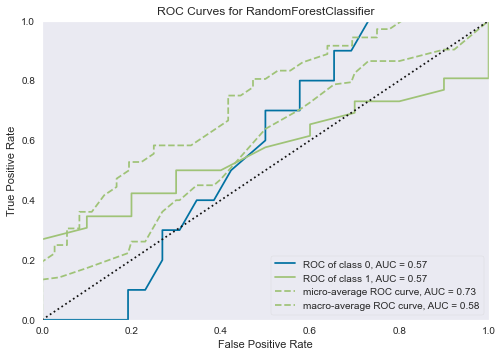


⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜

 Logistic Regression 

[[ 1  9]
 [ 3 23]]

Training Acc.  : 73.87%
Validation Acc.: 66.67%
              precision    recall  f1-score   support

           0       0.25      0.10      0.14        10
           1       0.72      0.88      0.79        26

    accuracy                           0.67        36
   macro avg       0.48      0.49      0.47        36
weighted avg       0.59      0.67      0.61        36



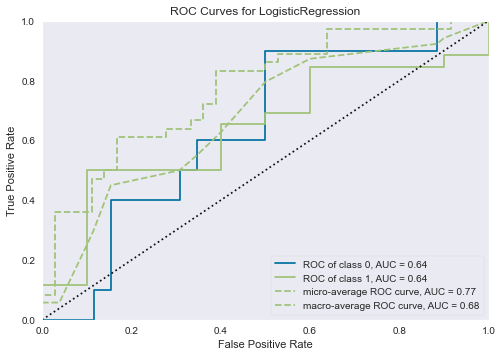


⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜

 KNN 

[[ 3  7]
 [ 3 23]]

Training Acc.  : 74.77%
Validation Acc.: 72.22%
              precision    recall  f1-score   support

           0       0.50      0.30      0.37        10
           1       0.77      0.88      0.82        26

    accuracy                           0.72        36
   macro avg       0.63      0.59      0.60        36
weighted avg       0.69      0.72      0.70        36



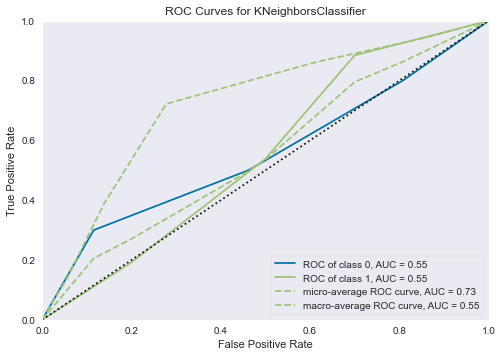


⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜

 Bagging Classifier

[[ 1  9]
 [ 6 20]]

Training Acc.  : 97.6%
Validation Acc.: 58.33%
              precision    recall  f1-score   support

           0       0.14      0.10      0.12        10
           1       0.69      0.77      0.73        26

    accuracy                           0.58        36
   macro avg       0.42      0.43      0.42        36
weighted avg       0.54      0.58      0.56        36



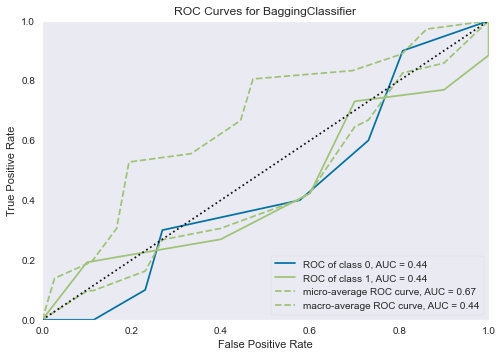


⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜



In [64]:
scores = trainer(x_train, y_train, x_test, y_test)

The difference between the training accuracy and validation accuracy tells us the tendency of the data to overfit, whereby it fits too closely to the training data but perform poorly on new or unseen data. From the above information, Random Forest Classifier and Bagging Classifier have a high tendency of overfitting. Therefore, we will be rejecting these 2 Machine Learning models as it is crucial that our model is able to perform well on new data obtained from the bloodwork of new patients. 

The Area Under Curve (AUC) also tells us the overall performance of the model. The higher the AUC, the better the overall performance. 


Narrowing between Logistic Regression Model and K-Nearest Neighbours (KNN) Model, we will be selecting the Logistic Regression model as it has a higher accuracy of 71.5% and higher AUC of 0.64, as compared to the KNN Model which has an accuracy of 68.5% and AUC of 0.55. 


# Step 5: Conclusion

We have identified above that the Machine Learning Model we will be using is Logistic Regression. We now want to identify the key factors that allow us to identify whether an individual is in early or late stage of liver cirrhosis. 



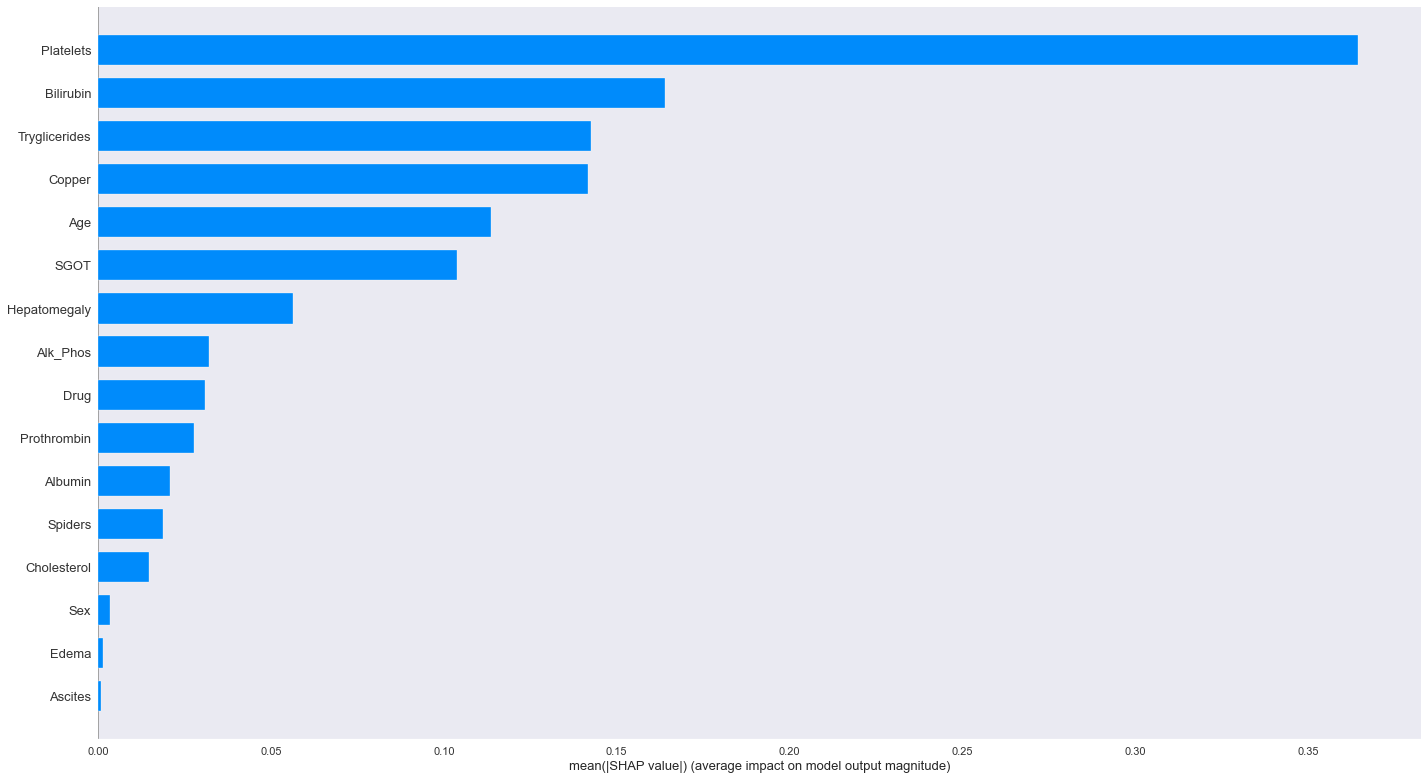

In [65]:
import shap
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
lr = LogisticRegression()
lr.fit(train, y.iloc[train_index])

# Create SHAP explainer object
explainer = shap.Explainer(lr, train)

# Calculate SHAP values
shap_values = explainer(test)

# Generate summary plot
shap.summary_plot(shap_values, train, plot_size=(20,11), alpha=0.2, plot_type='bar')


This plot features which factor has the greatest impact on the model's prediction. It appears that the top 4 most crucial factors are "Platelets", "Bilirubin", "Tryglicerides" and "Copper". While "Trygliceride" is a crucial factor from this plot, there is an insiginificant increase in "Tryglicerides" levels between Early and Late Stage as seen in the bar plot below (as obtained from Explorarory Data Analysis). Hence, we will be eliminating "Trygliceride" as a key factor. 

<AxesSubplot:xlabel='Early/Late Stage', ylabel='Tryglicerides'>

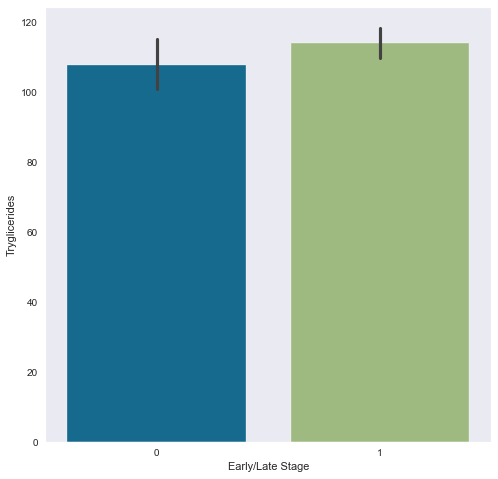

In [66]:
DF = pd.concat([ELStage,Tryglicerides], axis = 1).reindex(ELStage.index)
plt.figure(figsize=(8,8))
sns.barplot(data=DF, x ="Early/Late Stage", y = "Tryglicerides")

Therefore, in response to the questions we have posed, we can use the Logistic Regression model to predict if a patient is in early or late stage of liver cirrhosis, and the key factors in predicting liver cirrhosis are "Bilirubin", "Platelets" and "Copper". 

Bilirubin is released in a fluid, that is produced by the liver called bile. If bilirubin levels are elevated, this indicates that bilirubin is not properly released and is a sign of liver disease. 

Platelets are cells in the body that play a role in blood clotting. Liver disease can adversely affect the production and function of platelets, thus leading to a lower platelet count. Hence, a lower platelet count is an indicator of liver disease. 

Finally, the liver processes and excretes copper. As such, copper levels are elevated in individuals with liver disease as the liver is unable to regulate copper levels as well as before, thus leading to accumulation of copper. 